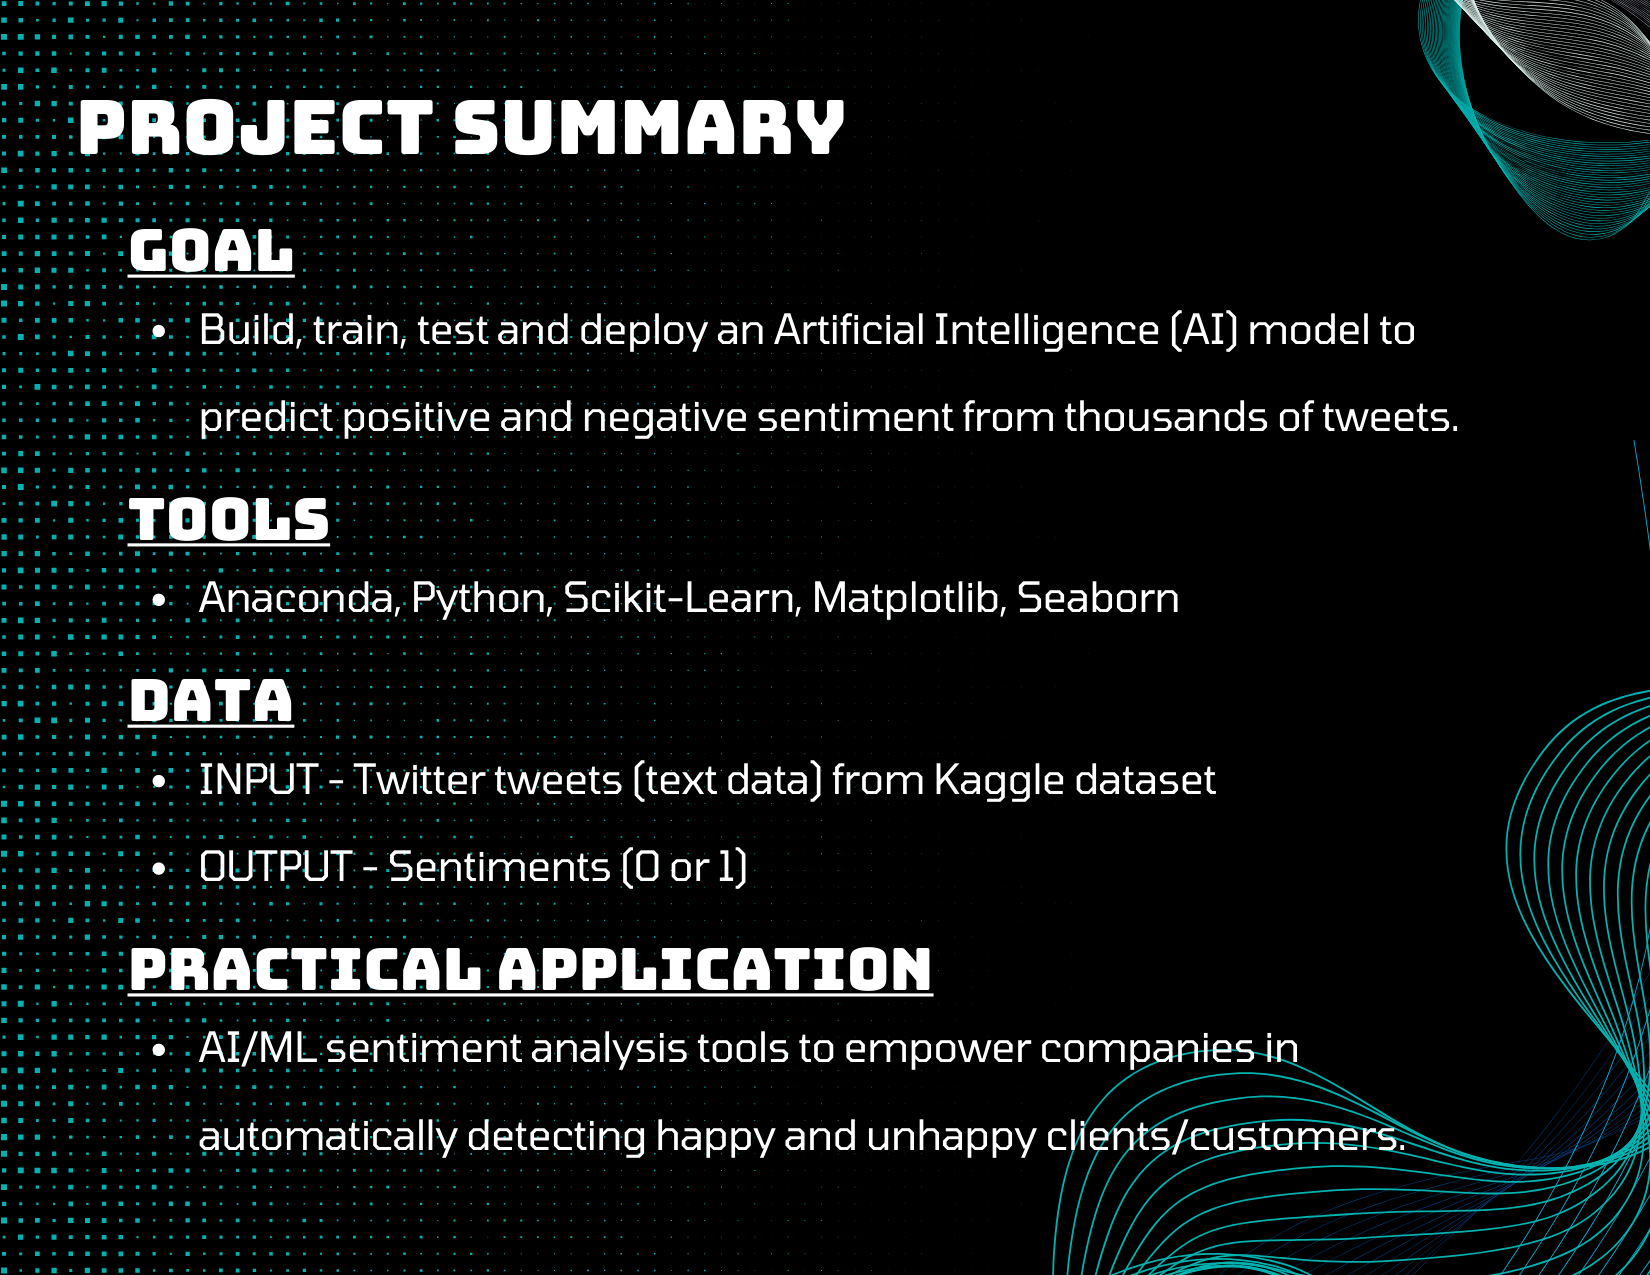

In [1]:
# import libraries and theme

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# install jupyterthemes
!pip install jupyterthemes

# update to latest version
!pip install --upgrade jupyterthemes

# monokai theme to see the x and y axes clearly
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)  


In [2]:
# Load the data

tweets_df = pd.read_csv(r'C:\Users\lkhoo\Python_Jupyter Notebook\NLP_Twitter Sentiment Analysis\twitter.csv')

tweets_df

id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]

In [3]:
# info of data

tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [4]:
# summary of data

tweets_df.describe()

id         label
count  31962.000000  31962.000000
mean   15981.500000      0.070146
std     9226.778988      0.255397
min        1.000000      0.000000
25%     7991.250000      0.000000
50%    15981.500000      0.000000
75%    23971.750000      0.000000
max    31962.000000      1.000000

In [5]:
# remove 'id' column

tweets_df = tweets_df.drop(['id'], axis=1)

tweets_df

label                                              tweet
0          0   @user when a father is dysfunctional and is s...
1          0  @user @user thanks for #lyft credit i can't us...
2          0                                bihday your majesty
3          0  #model   i love u take with u all the time in ...
4          0             factsguide: society now    #motivation
...      ...                                                ...
31957      0  ate @user isz that youuu?ðððððð...
31958      0    to see nina turner on the airwaves trying to...
31959      0  listening to sad songs on a monday morning otw...
31960      1  @user #sikh #temple vandalised in in #calgary,...
31961      0                   thank you @user for you follow  

[31962 rows x 2 columns]

In [6]:
# taking a look at 'tweet' column

tweets_df['tweet'] 

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

# Data exploration and feature classification

<AxesSubplot:>

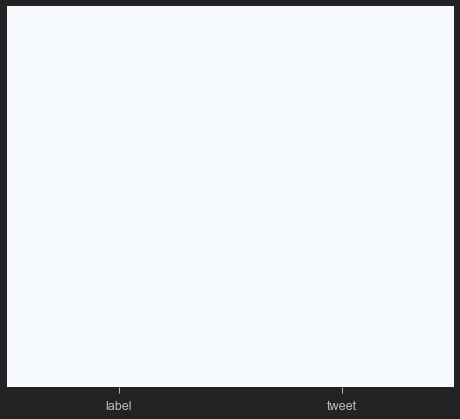

In [7]:
# check missing elements in graph format (none)

sns.heatmap(tweets_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

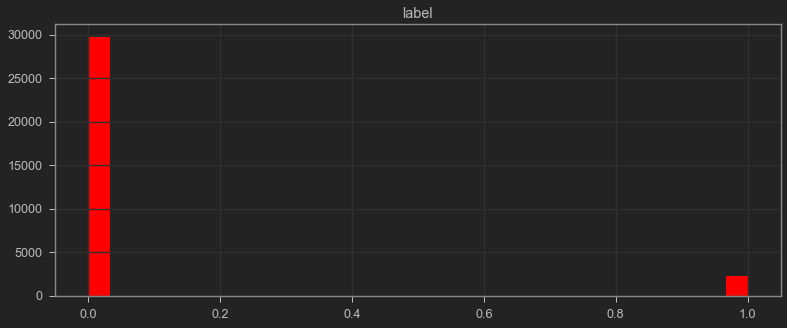

In [8]:
# plot histogram (unbalanced dataset)

tweets_df.hist(bins = 30, figsize = (13,5), color = 'red')

C:\Users\lkhoo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

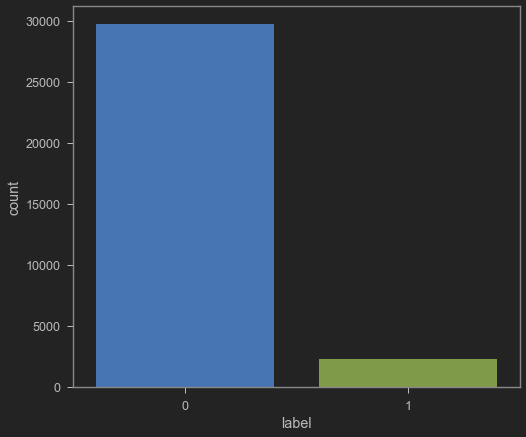

In [9]:
# plot countplot with seaborn

sns.countplot(tweets_df['label'], label = 'Count')

In [10]:
# length of the messages

tweets_df['length'] = tweets_df['tweet'].apply(len)

tweets_df

label                                              tweet  length
0          0   @user when a father is dysfunctional and is s...     102
1          0  @user @user thanks for #lyft credit i can't us...     122
2          0                                bihday your majesty      21
3          0  #model   i love u take with u all the time in ...      86
4          0             factsguide: society now    #motivation      39
...      ...                                                ...     ...
31957      0  ate @user isz that youuu?ðððððð...      68
31958      0    to see nina turner on the airwaves trying to...     131
31959      0  listening to sad songs on a monday morning otw...      63
31960      1  @user #sikh #temple vandalised in in #calgary,...      67
31961      0                   thank you @user for you follow        32

[31962 rows x 3 columns]

In [11]:
tweets_df.describe()

# shortest length at 11, longest at 274

label        length
count  31962.000000  31962.000000
mean       0.070146     84.739628
std        0.255397     29.455749
min        0.000000     11.000000
25%        0.000000     63.000000
50%        0.000000     88.000000
75%        0.000000    108.000000
max        1.000000    274.000000

In [12]:
# shortest message

tweets_df[tweets_df['length'] == 11] ['tweet']

25195    i love you 
Name: tweet, dtype: object

In [13]:
# message with mean length

tweets_df[tweets_df['length'] == 85]['tweet']

115       â #under the spell of brexit referendum - c...
242      make today count! #mondaymotivation #livelifet...
384      dream palace, can we move in already? #stellar...
573      @user monkeys are also declared as vermin. no ...
634      save thousands $$ free search x logins x broke...
                               ...                        
31393    #flagday2016   #flag #day #2016 #(30 #photos) ...
31468    jts88troxy theater   jts88@user ð #love #si...
31542    stretched to the limit and still #waiting pati...
31773    this reminds me of this. i am   love these two...
31799    can #lighttherapy help with   or #depression? ...
Name: tweet, Length: 387, dtype: object

In [14]:
# message with mean length, first element only

tweets_df[tweets_df['length'] == 85]['tweet'].iloc[0]

' â\x86\x9d #under the spell of brexit referendum - commerzbank   #blog #silver #gold #forex'

<AxesSubplot:ylabel='Frequency'>

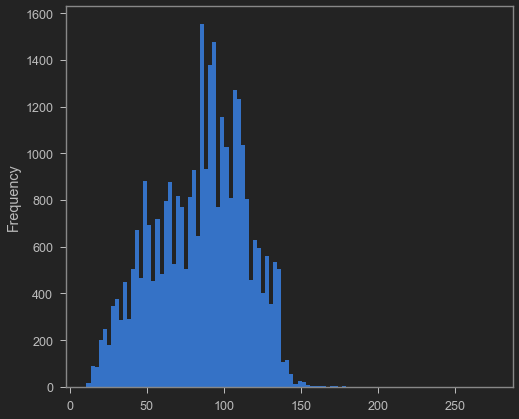

In [15]:
# plot histogram of length column

tweets_df['length'].plot(bins = 100, kind = 'hist')

In [16]:
# create new dataframe with positive tweets

positive = tweets_df[tweets_df['label'] == 0]

positive

label                                              tweet  length
0          0   @user when a father is dysfunctional and is s...     102
1          0  @user @user thanks for #lyft credit i can't us...     122
2          0                                bihday your majesty      21
3          0  #model   i love u take with u all the time in ...      86
4          0             factsguide: society now    #motivation      39
...      ...                                                ...     ...
31956      0  off fishing tomorrow @user carnt wait first ti...      61
31957      0  ate @user isz that youuu?ðððððð...      68
31958      0    to see nina turner on the airwaves trying to...     131
31959      0  listening to sad songs on a monday morning otw...      63
31961      0                   thank you @user for you follow        32

[29720 rows x 3 columns]

In [17]:
# create new dataframe with negative tweets

negative = tweets_df[tweets_df['label'] == 1]

negative

label                                              tweet  length
13         1  @user #cnn calls #michigan middle school 'buil...      74
14         1  no comment!  in #australia   #opkillingbay #se...     101
17         1                             retweet if you agree!       22
23         1    @user @user lumpy says i am a . prove it lumpy.      47
34         1  it's unbelievable that in the 21st century we'...     104
...      ...                                                ...     ...
31934      1  lady banned from kentucky mall. @user  #jcpenn...      59
31946      1  @user omfg i'm offended! i'm a  mailbox and i'...      82
31947      1  @user @user you don't have the balls to hashta...     112
31948      1   makes you ask yourself, who am i? then am i a...      87
31960      1  @user #sikh #temple vandalised in in #calgary,...      67

[2242 rows x 3 columns]

In [18]:
# combine positive tweets in a list to form string

sentences = tweets_df['tweet'].tolist()

len(sentences)

31962

In [19]:
sentences_string = " ".join(sentences)

sentences_string

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run @user @user thanks for #lyft credit i can\'t use cause they don\'t offer wheelchair vans in pdx.    #disapointed #getthanked   bihday your majesty #model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦    factsguide: society now    #motivation [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo    @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦ the next school year is the year for exams.ð\x9f\x98¯ can\'t think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦   @user @user welcome here !  i\'m   it\'s so #gr8 !   â\x86\x9d #ireland consumer price index (mom) climbed from pre

In [20]:
# install wordcloud

!pip install wordcloud

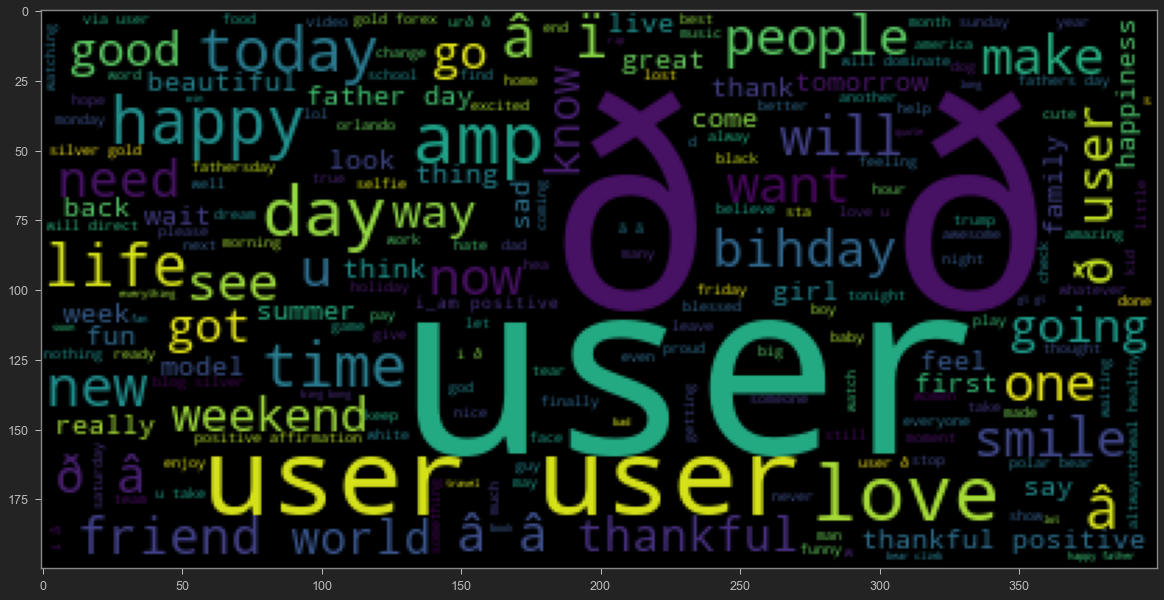

In [21]:
# create wordcloud 

from wordcloud import WordCloud

plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(sentences_string))

In [22]:
# create wordcloud with negative tweets

negative_sentences = negative['tweet'].tolist()

len(negative_sentences)

2242

In [23]:
negative_string = " ".join(negative_sentences)

negative_string

'@user #cnn calls #michigan middle school \'build the wall\' chant \'\' #tcot   no comment!  in #australia   #opkillingbay #seashepherd #helpcovedolphins #thecove  #helpcovedolphins retweet if you agree!  @user @user lumpy says i am a . prove it lumpy. it\'s unbelievable that in the 21st century we\'d need something like this. again. #neverump  #xenophobia  @user lets fight against  #love #peace  ð\x9f\x98©the white establishment can\'t have blk folx running around loving themselves and promoting our greatness   @user hey, white people: you can call people \'white\' by @user  #race  #identity #medâ\x80¦ how the #altright uses  &amp; insecurity to lure men into #whitesupremacy     @user i\'m not interested in a #linguistics that doesn\'t address #race &amp; . racism is about #power. #raciolinguistics bringsâ\x80¦ @user why not @user mocked obama for being black.  @user @user @user @user #brexit #people aren\'t protesting #trump because a #republican won-they do so because trump has fuhe

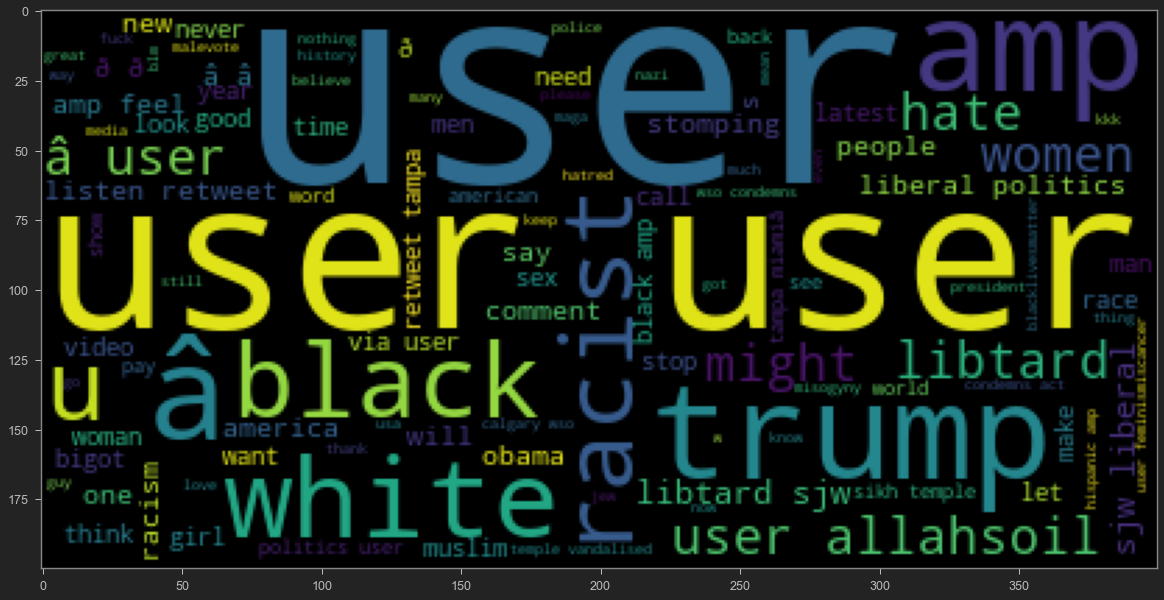

In [24]:
plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(negative_string))

# Data cleaning - sample 

In [25]:
# remove punctuation from text

import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

### SAMPLE TEST

In [26]:
# testing removal of punctuation (string comprehension)

Test = '$I love analysis & data visualisation!!'


Test_punctuations_removed = [char for char in Test if char not in string.punctuation]


# join the characters again to form the string

Test_punctuations_removed_join = ''.join(Test_punctuations_removed)


Test_punctuations_removed_join

'I love analysis  data visualisation'

In [27]:
# remove stopwords

import nltk # natural language tool kit
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lkhoo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### SAMPLE TEST

In [28]:
# testing stopwords

Test1 = 'I enjoy being active, dashboards and Artificial Intelligence'


# only important (not so common) words are left

Test1_cleaned = [word for word in Test1.split() if word.lower() not in stopwords.words('english')]


Test1_cleaned

['enjoy', 'active,', 'dashboards', 'Artificial', 'Intelligence']

In [29]:
# perform count vectorization (tokenization) - convert words into numbers to train AI model thereafter

from sklearn.feature_extraction.text import CountVectorizer


### SAMPLE TEST

In [30]:
# testing on sample data

sample_data = ['This is the first paper.','This document is the second paper.','And this is the third one.','Is this the first paper?']


vectorizer = CountVectorizer()

X = vectorizer.fit_transform(sample_data)




print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'paper', 'second', 'the', 'third', 'this']


C:\Users\lkhoo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [31]:
# convert to array format

print(X.toarray())

[[0 0 1 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 1 1 0 1]
 [1 0 0 1 1 0 0 1 1 1]
 [0 0 1 1 0 1 0 1 0 1]]


# Data cleaning - TWITTER DATASET

In [32]:
# define pipeline to clean up all messages: (1) remove punctuation, (2) remove stopwords

def tweets_pipeline(message):
    tweets_punc_removed = [char for char in message if char not in string.punctuation]
    tweets_punc_removed_joined = ''.join(tweets_punc_removed)
    tweets_punc_removed_joined_cleaned = [word for word in tweets_punc_removed_joined.split() if word.lower() not in stopwords.words('english')]
    return tweets_punc_removed_joined_cleaned


In [33]:
# newly added function

tweets_df_cleaned = tweets_df['tweet'].apply(tweets_pipeline)

In [38]:
# test on sample row (original)

print(tweets_df['tweet'][174])

everyone is everything   #sad #together #alone #up #down #fine #dandy #lonely #exuberant #depressed #halffull #halfempty


In [39]:
# test newly added function on above sample row

print(tweets_df_cleaned[175])

['mikeashley', 'sposdirectshame', 'perhapse', 'good', 'example', 'need', 'protect', 'workersrights', 'within', 'europe', 'euref', 'remain']


### YES! IT WORKS! :)

In [42]:
from sklearn.feature_extraction.text import CountVectorizer


# data type in 8 bit format (to counter memeroy issues)

vectorizer = CountVectorizer(analyzer = tweets_pipeline, dtype = np.uint8)

tweets_countvectorizer = vectorizer.fit_transform(tweets_df['tweet'])


In [43]:
# every single unique word in dataset

print(vectorizer.get_feature_names())

['0', '0000001', '00027', '001', '0035', '00h30', '01', '0115', '0161', '019', '01926889917', '02', '0265', '0266808099', '02900', '03', '030916', '03111880779', '032', '033', '0345', '039', '04', '045', '04k', '05', '0506823156', '06', '06052016', '0606', '060616', '0608', '0608wed', '0609', '0610', '061116', '0612', '0613', '0616', '0617', '0618', '0618saturday7monthscouple', '0618â\x99¡', '0620', '06202016', '0622', '0624', '06Â', '07', '07000', '07040', '07044', '07150', '07190', '07400', '07468', '07500', '076', '07788427999', '07800', '07840', '07850', '07870', '07900', '07930', '07950', '08', '0806', '080616', '088b', '08â\x80¦', '09', '09062016', '0933m', '09600', '0k', '0shares', '0tolerancemovie', '0ð\x9f\x98¥â\x98¹ï¸\x8f', '1', '10', '100', '1000', '100000', '10003', '10007', '1000gifts', '1000th', '1000x', '1000yr', '1000â\x82¬', '1001', '1001000s', '10014', '10021', '10025', '10040', '100616', '10064', '100d', '100daysofcode', '100daysofpigpaintings', '100daysoftea', '100f

In [44]:
# convert to array

print(tweets_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [45]:
# check shape of data (samples, columns)

tweets_countvectorizer.shape

(31962, 47386)

In [47]:
# convert entire dataframe into array format
# Using this tokenization table to train AI model

X = pd.DataFrame(tweets_countvectorizer.toarray())

X

0      1      2      3      4      5      6      7      8      9      \
0          0      0      0      0      0      0      0      0      0      0   
1          0      0      0      0      0      0      0      0      0      0   
2          0      0      0      0      0      0      0      0      0      0   
3          0      0      0      0      0      0      0      0      0      0   
4          0      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
31957      0      0      0      0      0      0      0      0      0      0   
31958      0      0      0      0      0      0      0      0      0      0   
31959      0      0      0      0      0      0      0      0      0      0   
31960      0      0      0      0      0      0      0      0      0      0   
31961      0      0      0      0      0      0      0      0      0      0   

       ...  47376  47377  47378  47379  47380  47381  47382  47383  47384  \
0      ...      0      0      0      0      0      0      0      0      0   
1      ...      0      0      0      0      0      0      0      0      0   
2      ...      0      0      0      0      0      0      0      0      0   
3      ...      0      0      0      0      0      0      0      0      0   
4      ...      0      0      0      0      0      0      0      0      0   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
31957  ...      0      0      0      0      0      0      0      0      0   
31958  ...      0      0      0      0      0      0      0      0      0   
31959  ...      0      0      0      0      0      0      0      0      0   
31960  ...      0      0      0      0      0      0      0      0      0   
31961  ...      0      0      0      0      0      0      0      0      0   

       47385  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
31957      0  
31958      0  
31959      0  
31960      0  
31961      0  

[31962 rows x 47386 columns]

In [48]:
# output - binary class either positive (0) or negative(1)

y = tweets_df['label']

# NLP: Train and evaluate Naive Bayes Classification Model

In [50]:
X.shape

(31962, 47386)

In [51]:
y.shape

(31962,)

In [52]:
# take X and y data and split into training and testing (80% for training and 20% for testing to avoid biasness)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2 )

In [55]:
# import Naive Bayes classifier

from sklearn.naive_bayes import MultinomialNB

In [57]:
# apply fit method and pass along training data for training

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [59]:
# plot confusion matrix using sklearn

from sklearn.metrics import classification_report, confusion_matrix

In [60]:
# predict test set results 
# (1) get trained object(NB_classifier), apply predict method by passing along testing data (X_)
# (2) get the trained model and feed it into testing data to generate y_predict_test
# (3) get confusion matrix and pass along predictions out of model and y_test (true class)

y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix (y_test, y_predict_test)

<AxesSubplot:>

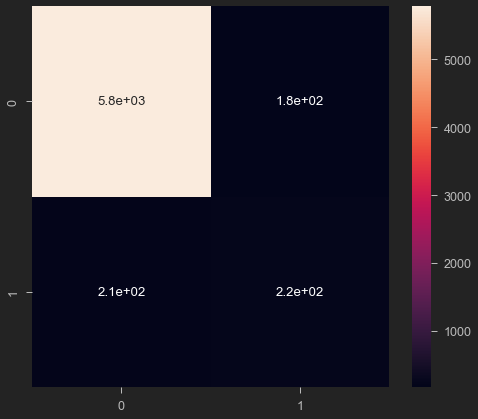

In [61]:
# use seaborn heatmap to pass along confusion matrix and add annotations
# (overall number of samples that has been correctly classified vs misclassified)

sns.heatmap(cm, annot=True)

In [63]:
# view classification report

print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5959
           1       0.56      0.51      0.53       434

    accuracy                           0.94      6393
   macro avg       0.76      0.74      0.75      6393
weighted avg       0.94      0.94      0.94      6393

